In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv('populacao_brasileira.csv', index_col=0)

In [ ]:
dados.columns

Index(['estado', 'idade', 'escolaridade', 'nível de proficiência em inglês',
       'renda', 'sexo'],
      dtype='object')

### 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.


In [ ]:
quant_pessoas = len(dados)

quant_fluente_ingles = dados[dados['nível de proficiência em inglês'] == 'Avançado'].shape[0]

In [ ]:
complementar = (1 - quant_fluente_ingles/quant_pessoas)*100
print('A valor complementar da probabilidade é que', round(complementar, 2), '%.')

A valor complementar da probabilidade é que 65.6 %.


### 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
dados_AL_PA = dados[(dados['estado'] == 'AL') | (dados['estado'] == 'PA')]

quant_AL_PA = dados_AL_PA.shape[0]
renda_5mil_AL_PA = dados_AL_PA[dados_AL_PA['renda'] > 5000].shape[0]

print('Probabilidade de pessoas de AL e PA terem renda maior que 5.000 mil reais é:', round(renda_5mil_AL_PA/quant_AL_PA, 2))

Probabilidade de pessoas de AL e PA terem renda maior que 5.000 mil reais é: 0.05


### 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

**Usa-se distribuição geométrica para responder essa questão.**

In [ ]:
dados_AM = dados[(dados['estado'] == 'AM')]
quant_AM = dados_AM.shape[0]
superior_AM = dados_AM[(dados_AM['escolaridade'] == 'Superior') | (dados_AM['escolaridade'] == 'Pós-graduação')]
quant_superior_AM = superior_AM.shape[0]

proporcao_ensino_superior_AM  = quant_superior_AM/quant_AM

In [ ]:
prob_quinta_pessoa_amazonense = stats.geom.pmf(k=5, p=proporcao_ensino_superior_AM)

print(f"Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo: {prob_quinta_pessoa_amazonense:.2%}")

Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo: 2.21%


### 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

Faixa de renda predominante: 3000 - 4500


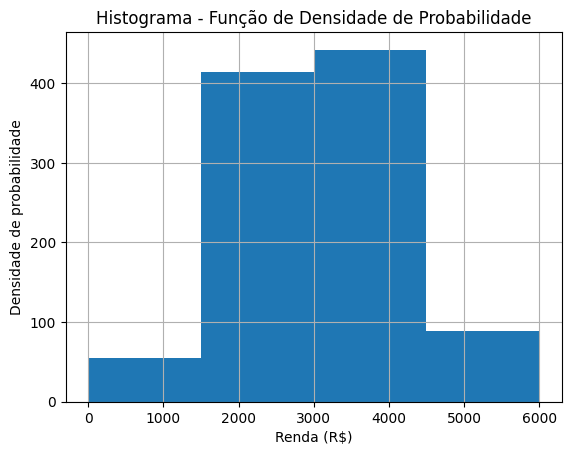

In [ ]:
intervalo = 1500
faixas_renda = np.arange(0, dados['renda'].max() + intervalo, intervalo)
contagem_por_faixa, _ = np.histogram(dados['renda'], bins=faixas_renda)

faixa_predominante = np.argmax(contagem_por_faixa) * intervalo
print("Faixa de renda predominante:", faixa_predominante, "-", faixa_predominante + intervalo)

plt.hist(dados['renda'], bins=faixas_renda)
plt.title('Histograma - Função de Densidade de Probabilidade')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()


### 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.


Média da renda: 3082.5371800000003
Variância da renda: 993156.2281676152


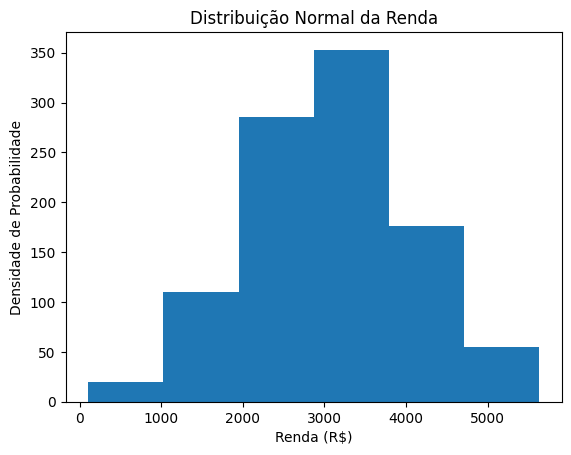

In [ ]:
media_renda = dados['renda'].mean()
variancia_renda = dados['renda'].var()

print(f"Média da renda: {media_renda}")
print("Variância da renda:", variancia_renda)

plt.hist(dados['renda'], bins=6)
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de Probabilidade')
plt.show()

### 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

**Usando distribuição binomial.**

In [ ]:
quant_pessoas

probabilidade_pos_graduacao = dados[dados.escolaridade == 'Pós-graduação']['escolaridade'].count()/quant_pessoas

# Tamanho da amostra (população brasileira com 1 milhão de habitantes)
n = 1_000_000

# Número de sucessos desejados (243 mil pessoas com pós-graduação)
k = 243000

# Calcular a probabilidade usando a distribuição binomial
probabilidade = stats.binom.pmf(k, n, 0.253)

print(f"Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: {probabilidade}")


Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: 1.1104854289794913e-119


### 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.


Função de Densidade Acumulada Discreta:
 Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: escolaridade, dtype: float64


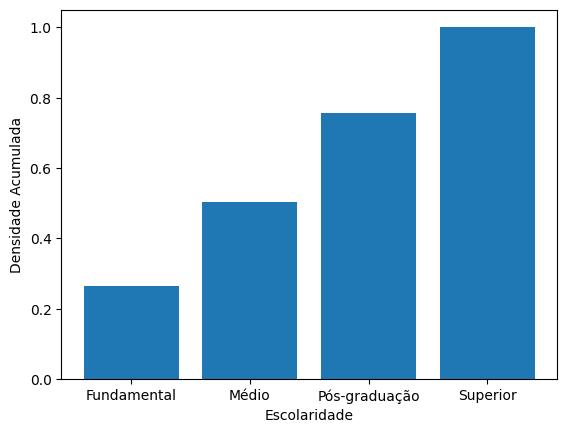

In [ ]:
cont_escolaridade = dados['escolaridade'].value_counts().sort_index()

frequencia_relativa = cont_escolaridade / len(dados)

densidade_acumulada = frequencia_relativa.cumsum()

print("Função de Densidade Acumulada Discreta:\n", densidade_acumulada)

plt.bar(densidade_acumulada.index, densidade_acumulada)
plt.xlabel('Escolaridade')
plt.ylabel('Densidade Acumulada')
plt.show()


### 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?


In [ ]:
prop_intermediario = (dados['nível de proficiência em inglês'] == 'Intermediário').mean()

confianca = 0.95

z = stats.norm.ppf((1 + confianca) / 2)

# Calcular a margem de erro amostral
margem_erro = z * ((prop_intermediario * (1 - prop_intermediario)) / quant_pessoas) ** 0.5

print("Margem de erro amostral para a proporção de pessoas com nível de inglês intermediário:", margem_erro)


Margem de erro amostral para a proporção de pessoas com nível de inglês intermediário: 0.029121068108804226


### 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

**Distribuição bonomial**

In [ ]:
desvio_renda = dados['renda'].std()

valor_referencia = media_renda + 1000


probabilidade_superior = 1 - stats.norm.cdf(valor_referencia, loc=media_renda, scale=dados['renda'].std())

k = 60  # Número de pessoas com uma renda superior ao valor de referência

probabilidade_60_pessoas = stats.binom.pmf(k, quant_pessoas, probabilidade_superior)

print("Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média:", probabilidade_60_pessoas)


Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média: 1.159703840678535e-21


### 10.  Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:

freq_sudeste = (dados['estado'].isin(['SP', 'RJ', 'ES', 'MG'])).mean()

freq_homem = (dados['sexo'] == 'M').mean()

freq_ensino_fundamental = (dados['escolaridade'] == 'Fundamental').mean()

freq_renda_2mil = (dados['renda'] > 2000).mean()

probabilidade = freq_sudeste * freq_homem * freq_ensino_fundamental * freq_renda_2mil

print("Probabilidade de escolher alguém do Sudeste, homem, com ensino fundamental e renda maior que 2 mil reais por mês:", probabilidade)


Probabilidade de escolher alguém do Sudeste, homem, com ensino fundamental e renda maior que 2 mil reais por mês: 0.017414252856


In [ ]:
tudo_junto = dados[(dados['escolaridade'] == 'Fundamental') & (dados['estado'].isin(['SP', 'RJ', 'ES', 'MG'])) & (dados['sexo'] == 'M') & (dados['renda'] > 2000)]
tudo_junto

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
155,ES,32,Fundamental,Intermediário,3615.94,M
163,ES,45,Fundamental,Básico,4049.01,M
205,ES,19,Fundamental,Avançado,3026.09,M
301,SP,50,Fundamental,Avançado,2786.01,M
505,SP,18,Fundamental,Básico,2961.49,M
524,MG,27,Fundamental,Intermediário,4148.77,M
612,RJ,19,Fundamental,Intermediário,2008.61,M
626,RJ,21,Fundamental,Intermediário,4022.57,M
680,ES,29,Fundamental,Intermediário,2164.65,M
732,MG,50,Fundamental,Intermediário,4091.31,M


In [ ]:
len(tudo_junto)/1_000

0.019

In [ ]:
[freq_sudeste, freq_homem, freq_ensino_fundamental, freq_renda_2mil]

[0.157, 0.486, 0.266, 0.858]

In [ ]:
0.157* 0.486* 0.266* 0.858

0.017414252856